In [32]:
%matplotlib inline

import os

import ipywidgets as ipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from skimage.color import label2rgb

from preparation import train_valid_split
from utils import read_masks
from postprocessing import get_clean_mask, postprocess, mean_blob_size

In [8]:
meta = pd.read_csv('/mnt/ml-team/dsb_2018/files/stage1_metadata.csv')
meta_test = meta[meta['is_train']==0]
meta_train, meta_valid = train_valid_split( meta[meta['is_train']==1],0.2,[0,1])

In [17]:
masks = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/dev_post/outputs/mask_resize')['resized_images']
contours = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/dev_post/outputs/contour_resize')['resized_images']
ground_truth = read_masks(meta_valid['file_path_masks'].tolist())

100%|██████████| 84/84 [00:04<00:00, 17.22it/s]


In [55]:
import skimage.morphology as morph
from skimage.filters import roberts, sobel, scharr, prewitt, threshold_niblack
from skimage.exposure import adjust_gamma, rescale_intensity
import scipy.ndimage as ndi

In [72]:
def oddify(x):
    if x % 2 ==0:
        return x + 1
    else:
        return x

0


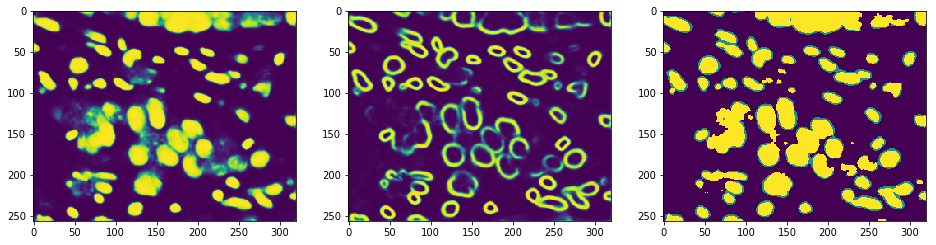

7


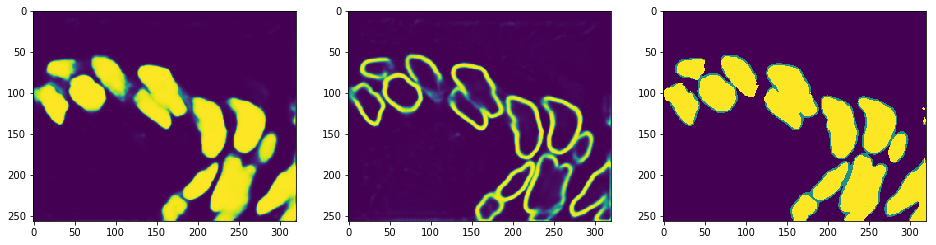

13


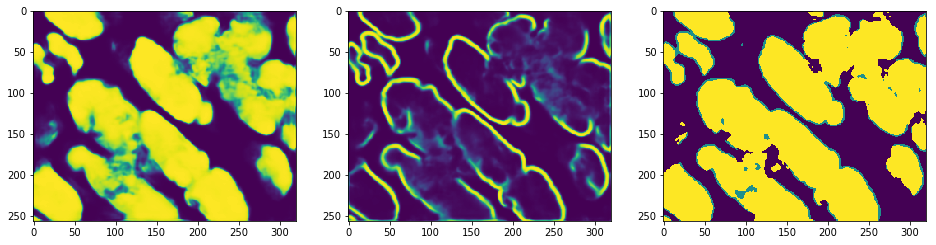

19


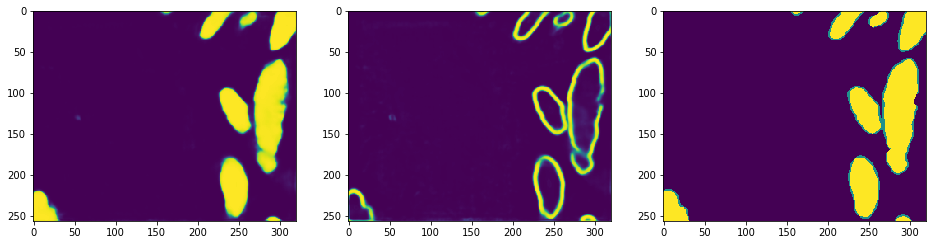

21


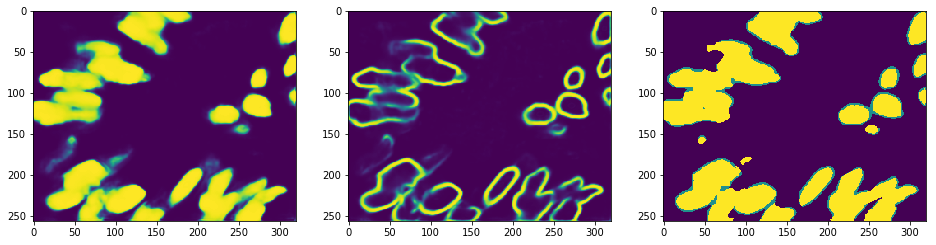

35


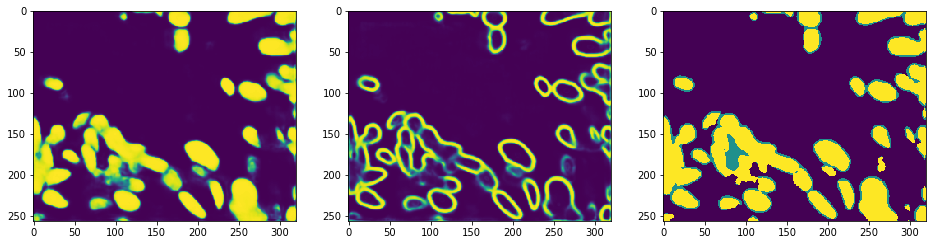

39


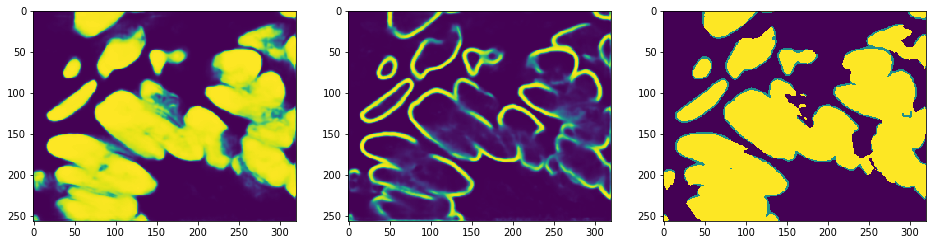

43


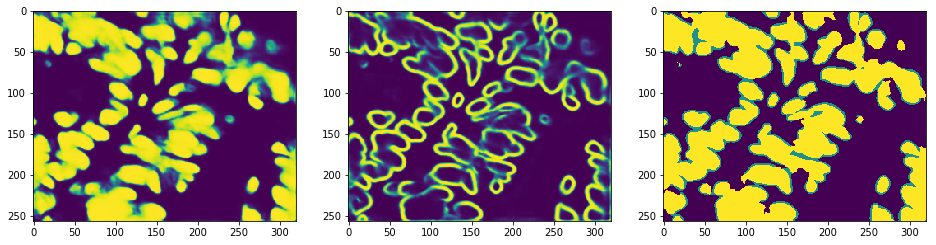

50


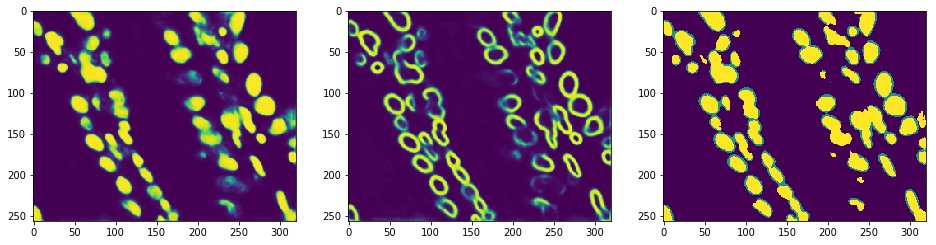

52


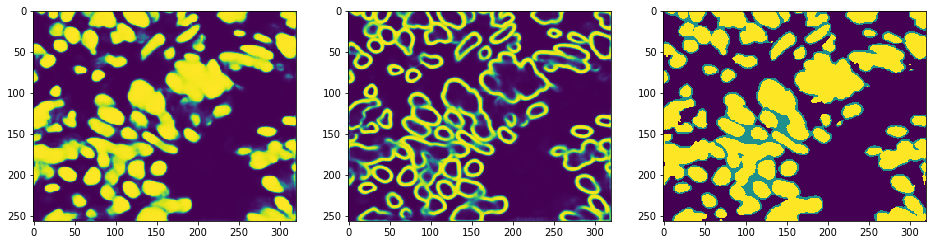

55


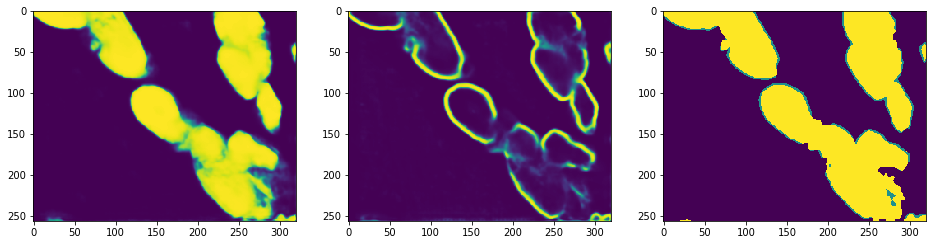

78


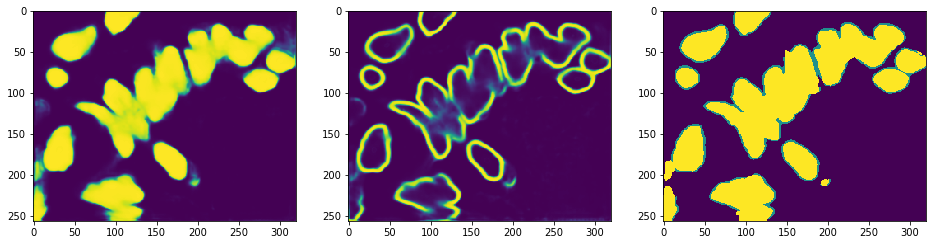

79


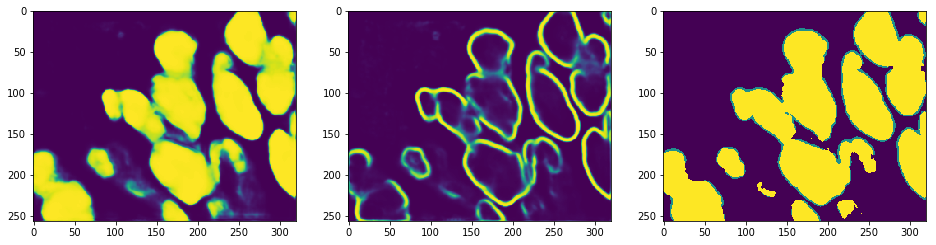

In [90]:
for idx in [0,7,13,19,21,35,39,43,50,52,55,78,79]:
# for idx in [79]:
    print(idx)
    mask = masks[idx]
    contour = contours[idx]
    gt = ground_truth[idx]
    
    gt_ = gt > 0.5
    
    mask_ = np.where(mask>0.5, 1, 0)
    contour_ = np.where(contour>0.5, 1, 0)

    contour_filled = ndi.binary_fill_holes(contour_)
    
    added = mask_+contour_filled
    added = ndi.binary_fill_holes(added)
    
    imposed = mask_+ added
    
    plt.figure(figsize=(16,12))
    plt.subplot(231)
    plt.imshow(mask)
    plt.subplot(232)
    plt.imshow(contour)
    plt.subplot(233)
    plt.imshow(imposed) 

#     mask_ = adjust_gamma(mask_, gamma=10.0)
#     edge_roberts = roberts(mask_)
#     edge_sobel = sobel(mask_)
#     edge_scharr = scharr(mask_)
#     edge_prewitt = prewitt(mask_)
#     edge_sum = edge_roberts+edge_sobel+edge_scharr+edge_prewitt
#     edge_sum = rescale_intensity(edge_sum)
#     odd_radius = oddify(2*radius)
# #     mask_ = threshold_niblack(mask_, window_size=odd_radius, k=0.2)
# #     mask_ = np.where(np.isnan(mask_),0,mask_)
# #     contour_ = threshold_niblack(contour, window_size=odd_radius, k=0.2)
# #     contour_ = np.where(np.isnan(contour_),0,contour_)

#     added = mask_+contour
    
#     plt.figure(figsize=(16,12))
#     plt.subplot(231)
#     plt.imshow(mask)
#     plt.subplot(232)
#     plt.imshow(contour)
#     plt.subplot(233)
#     plt.imshow(added)
#     plt.subplot(234)
#     plt.imshow(mask_ - gt_)
#     plt.subplot(235)
#     plt.imshow(gt>0.5)
#     plt.subplot(236)
#     plt.imshow(gt_ - mask_)
    plt.show()